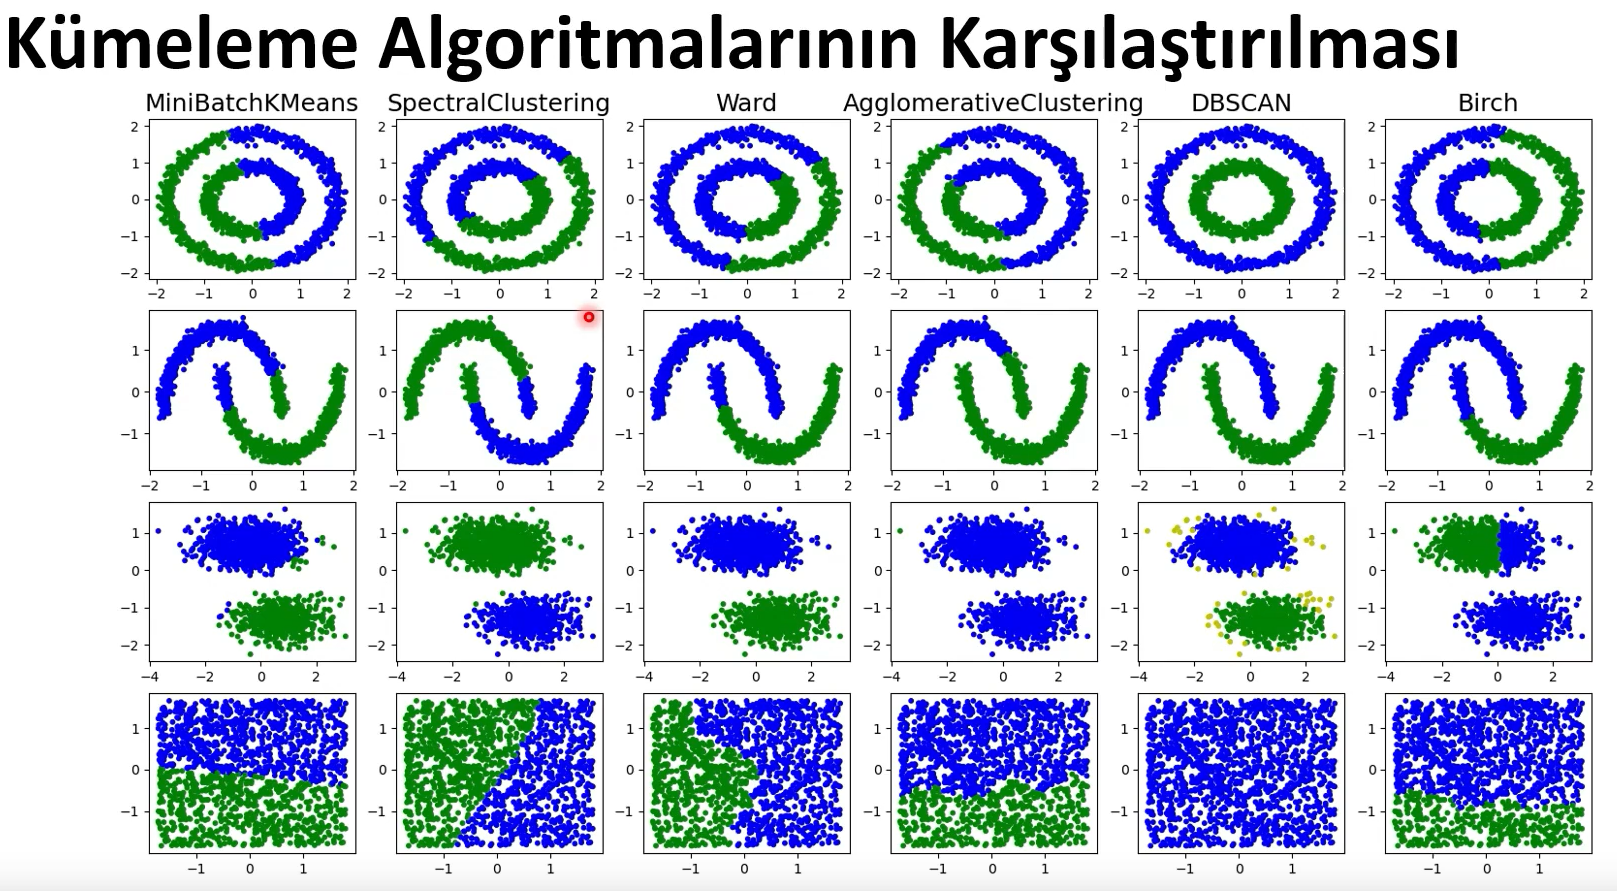

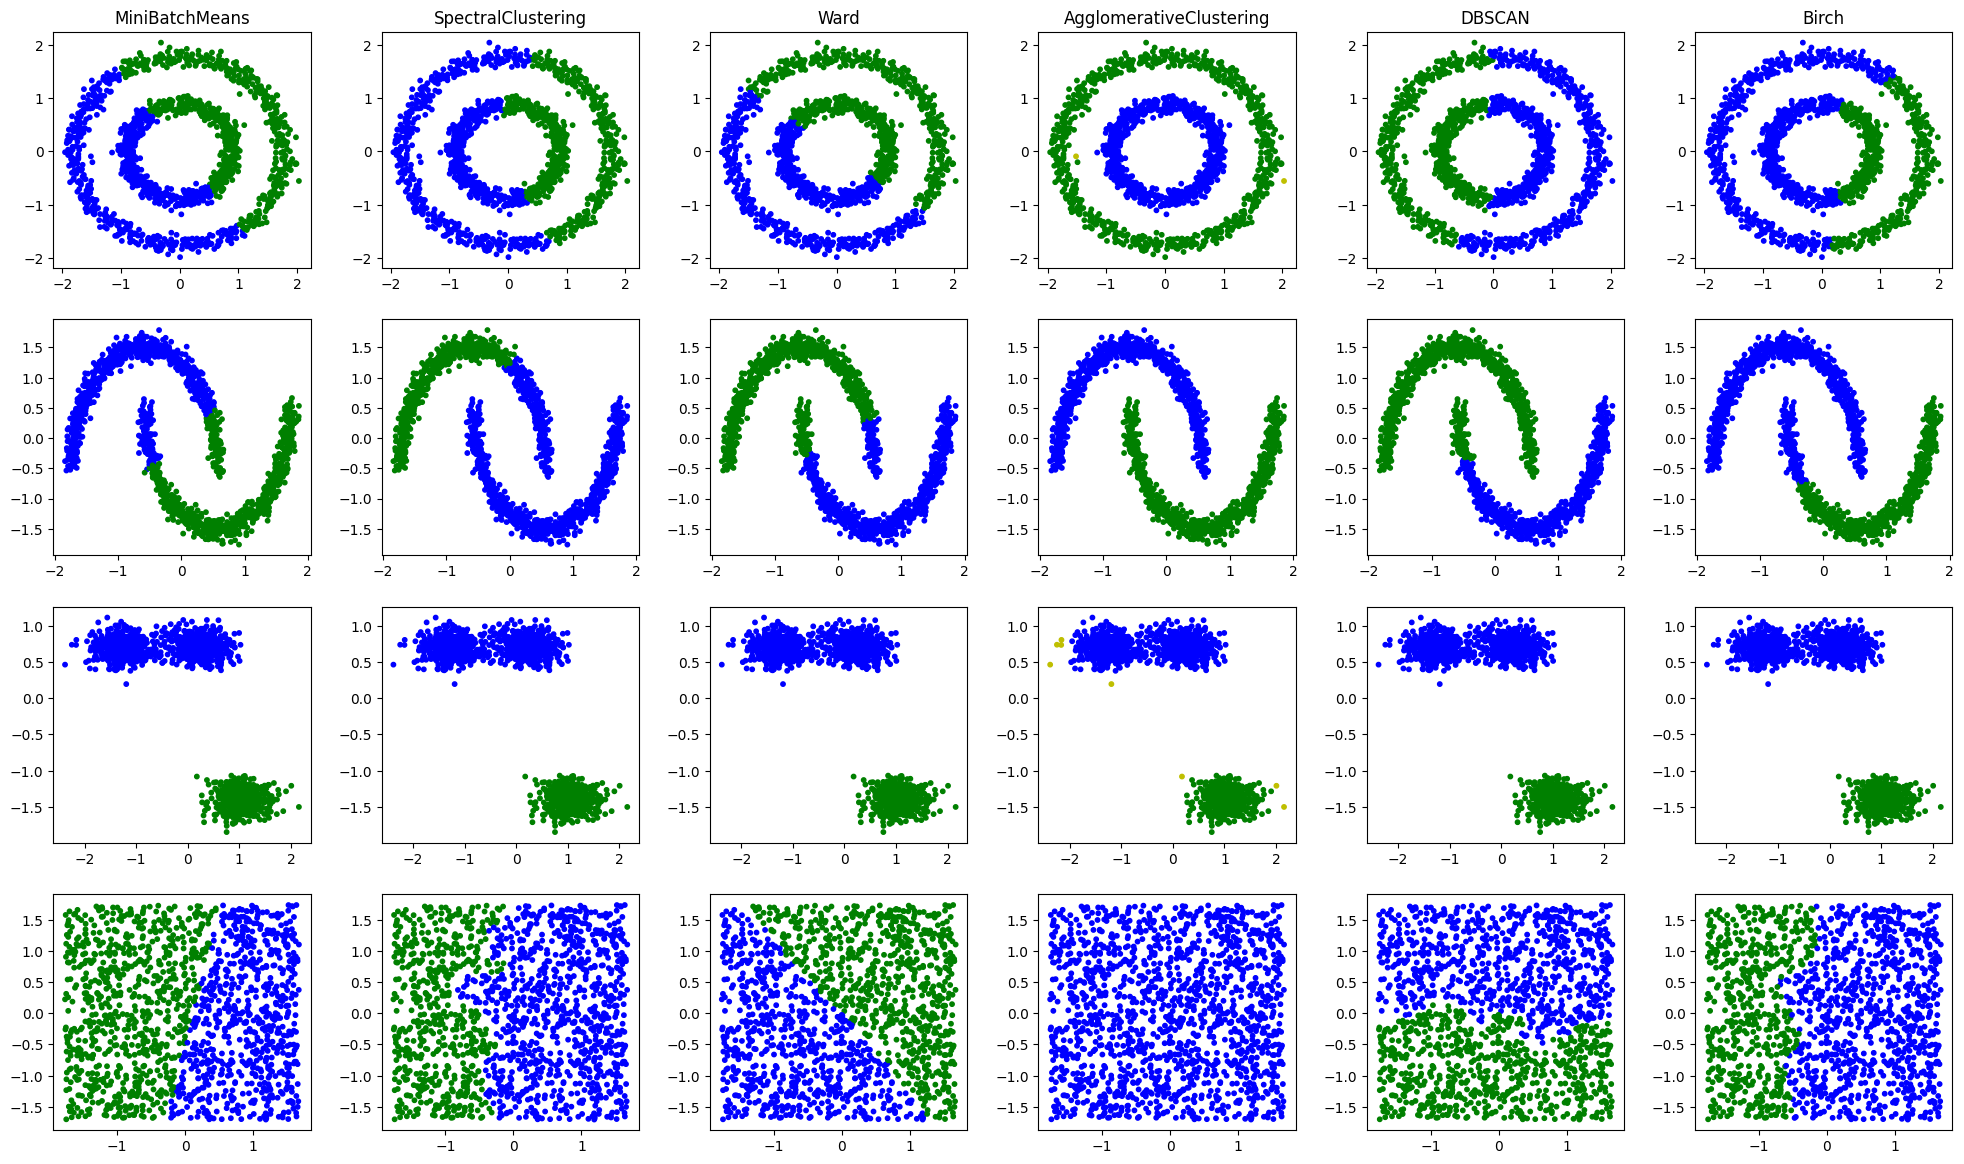

In [12]:
from sklearn import datasets, cluster
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt

n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples)
no_structure = np.random.rand(n_samples, 2), None

clustering_names = [
    "MiniBatchMeans", "SpectralClustering", "Ward",
    "AgglomerativeClustering", "DBSCAN", "Birch"
]

colors = np.array(["b", "g", "r", "c", "m", "y"])
datasets_list = [noisy_circles, noisy_moons, blobs, no_structure]

plt.figure(figsize=(20, 12))
i = 1  # subplot index
for i_dataset, dataset in enumerate(datasets_list):
    X, y = dataset
    X = StandardScaler().fit_transform(X)

    two_means = cluster.MiniBatchKMeans(n_clusters=2)
    ward = cluster.AgglomerativeClustering(n_clusters=2, linkage="ward")
    spectral = cluster.SpectralClustering(n_clusters=2)
    dbscan = cluster.DBSCAN(eps=0.2)
    average_linkage = cluster.AgglomerativeClustering(n_clusters=2, linkage="average")
    birch = cluster.Birch(n_clusters=2)

    clustering_algorithms = [
        two_means, ward, spectral, dbscan, average_linkage, birch
    ]

    for name, algo in zip(clustering_names, clustering_algorithms):
        algo.fit(X)

        if hasattr(algo, "labels_"):
            y_pred = algo.labels_.astype(int)
        else:
            y_pred = algo.predict(X)

        plt.subplot(len(datasets_list), len(clustering_algorithms), i)
        if i_dataset == 0:
            plt.title(name)
        plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred].tolist(), s=10)
        i += 1

plt.tight_layout(pad=2.0)
plt.show()
